In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_data = pd.read_csv(mouse_file)
Mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
#Clinical Trial Data
clinical_data=pd.read_csv(clinical_file)
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
single_data = pd.merge(clinical_data,Mouse_data, how="left", on="Mouse ID")
single_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumer_df = single_data.groupby(["Drug", "Timepoint"])
mean_TumorVolume = tumer_df["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
mean_TumorVolume = mean_TumorVolume.reset_index()
mean_TumorVolume = pd.DataFrame(mean_TumorVolume)
# Preview DataFrame
mean_TumorVolume.head(15)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = single_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_sem = tumor_sem.reset_index()
# Convert to DataFrame
tumor_sem =pd.DataFrame(tumor_sem)
# Preview DataFrame
tumor_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_munging = mean_TumorVolume.pivot_table(index = "Timepoint",columns ="Drug",values ="Tumor Volume (mm3)")
# Preview DataFrame
tumor_munging =pd.DataFrame(tumor_munging)
# Preview that Reformatting worked
tumor_munging.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


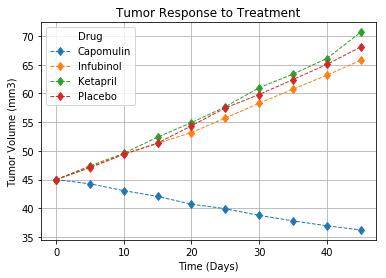

In [7]:
# Generate the Plot (with Error Bars)
tumor_munging = tumor_munging.loc[:, ['Capomulin','Infubinol','Ketapril','Placebo']]
tumor_munging.head()
tumor_munging.plot(kind = 'line', title ='Tumor Response to Treatment', marker = 'd',linestyle='dashed',linewidth=1, alpha=1)
plt.grid()
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Time (Days)")


# Save the Figure
plt.savefig("../Images/Tumor Response to Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
site_data = single_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
site_data =site_data.reset_index()
site_data = pd.DataFrame(site_data)
# Preview DataFrame
site_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
site_data2= single_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
site_data2 = site_data2.reset_index()
# Convert to DataFrame
site_data2 = pd.DataFrame(site_data)
# Preview DataFrame
site_data2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Minor Data Munging to Re-Format the Data Frames
minor_munging = site_data.pivot_table(index = "Timepoint",columns ="Drug",values="Metastatic Sites")
minor_munging =pd.DataFrame(minor_munging)
# Preview that Reformatting worked
minor_munging.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
minor_munging = minor_munging.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']]
minor_munging.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


<Figure size 720x720 with 0 Axes>

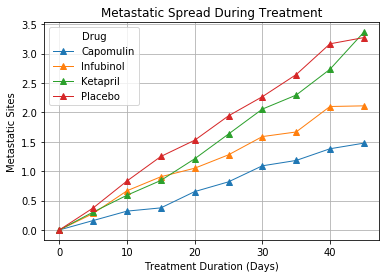

In [12]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,10))
minor_munging.plot(kind = 'line', title ='Metastatic Spread During Treatment', marker = '^',linewidth=1, alpha=1)
plt.grid()
plt.ylabel('Metastatic Sites')
plt.xlabel("Treatment Duration (Days)")
# Save the Figure
plt.savefig('../Images/Metastatic Spread During Treatment')
# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = single_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()
mice_count = mice_count.reset_index()

# Convert to DataFrame

mice_count = pd.DataFrame(mice_count)
mice_count = mice_count.rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_munging = mice_count.pivot_table(index = "Timepoint",columns ="Drug",values ="Mouse Count")

# Preview DataFrame

mice_munging.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


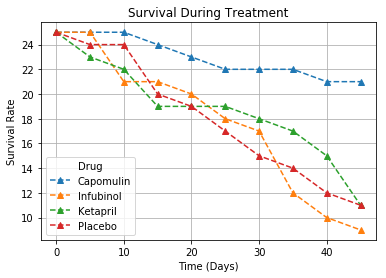

In [15]:
# Generate the Plot (Accounting for percentages)
mice_munging = mice_munging.loc[:, ['Capomulin','Infubinol','Ketapril','Placebo']]
mice_munging.head()
mice_munging.plot(kind = 'line', title ='Survival During Treatment', marker = '^',linestyle="dashed")
plt.grid()
plt.ylabel('Survival Rate')
plt.xlabel("Time (Days)")
# Save the Figure
plt.savefig('Survival During Treatment')
# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
precent_change = single_data.pivot_table('Tumor Volume (mm3)','Drug','Timepoint',aggfunc=np.mean)

avgvolchange = (precent_change[max(precent_change.columns.values)] - 
                 precent_change[min(precent_change.columns.values)])/precent_change[min(precent_change.columns.values)]*100

# Display the data to confirm
avgvolchange



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

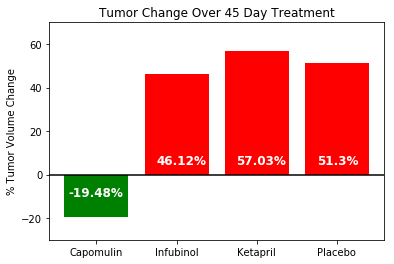

In [17]:
# Store all Relevant Percent Changes into a Tuple

tumor_changes=(avgvolchange["Capomulin"],avgvolchange["Infubinol"],avgvolchange["Ketapril"],avgvolchange["Placebo"])


# Splice the data between passing and failing drugs

x_axis=np.arange(4)
x_labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tick_locations=[value for value in x_axis]
plt.bar(x_axis, tumor_changes, color=['green' if tumor_changes[x]<0 else 'red' for x in x_axis])


# Orient widths. Add labels, tick marks, etc. 
plt.axhline(y=0, color='black')
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(tick_locations, x_labels)
plt.ylim(-30, 70)


# Use functions to label the percentages of changes
def autolabel(values_list):
    for idx, value in enumerate(values_list):
        if value > 0:
            plt.text(idx-0.25, 5, f'{round(value,2)}%', color='white', fontsize=12, fontweight='bold')
        else:
            plt.text(idx-0.35, -10, f'{round(value,2)}%', color='white', fontsize=12, fontweight='bold')


# Call functions to implement the function calls
autolabel(tumor_changes)

# Save the Figure
plt.savefig("../Images/pct_change_by_treatment.png")

# Show the Figure
plt.show()


